In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, Lasso, \
LassoCV, ElasticNet, ElasticNetCV
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor, RandomForestRegressor, ExtraTreesRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.decomposition import PCA
#imports

In [2]:
twenty_stats = pd.read_csv('./datasets/twenty_STATS.csv')
nineteen_stats = pd.read_csv('./datasets/nineteen_STATS.csv')
eighteen_stats =  pd.read_csv('./datasets/eighteen_STATS.csv')
seventeen_stats = pd.read_csv('./datasets/seventeen_STATS.csv')
sixteen_stats = pd.read_csv('./datasets/sixteen_STATS.csv')
fifteen_stats = pd.read_csv('./datasets/fifteen_STATS.csv')
fourteen_stats = pd.read_csv('./datasets/fourteen_STATS.csv')
thirteen_stats = pd.read_csv('./datasets/thirteen_STATS.csv')
twelve_stats = pd.read_csv('./datasets/twelve_STATS.csv')
eleven_stats = pd.read_csv('./datasets/eleven_STATS.csv')


eleven_salary = pd.read_csv('./datasets/eleven_salary.csv')
twelve_salary = pd.read_csv('./datasets/twelve_salary.csv')
thirtheen_salary = pd.read_csv('./datasets/thirtheen_salary.csv')
fourteen_salary = pd.read_csv('./datasets/fourteen_salary.csv')
fifteen_salary = pd.read_csv('./datasets/fifteen_salary.csv')
sixteen_salary = pd.read_csv('./datasets/sixteen_salary.csv')
seventeen_salary = pd.read_csv('./datasets/seventeen_salary.csv')
eighteen_salary = pd.read_csv('./datasets/eighteen_salary.csv')
twenty_salary = pd.read_csv('./datasets/NBA_Player_salaries_1920.csv')


twenty_stats_and_sal = pd.read_csv('./datasets/twenty_stats_and_sal.csv')
sixteen_to_twenty_with_sal = pd.read_csv('./datasets/sixteen_to_twenty_with_sal.csv')
seventeen_to_twenty_with_sal = pd.read_csv('./datasets/seventeen_to_twenty_with_sal.csv')



#Reading in data from 2019-2020, all subsequent reading in of data will be similar i.e. will be named with the year in which
#the season ended

In [3]:
twenty_stats_and_sal.describe()

,Age,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,2019-20
count,463.000000,463.000000,463.000000,463.000000,463.000000,463.000000,461.000000,463.000000,463.000000,442.000000,...,463.000000,463.000000,463.000000,463.000000,463.000000,463.000000,463.000000,463.000000,463.000000,4.630000e+02
mean,25.941685,45.438445,21.937365,20.568035,3.399784,7.450540,0.450733,1.003672,2.848164,0.317041,...,0.878186,2.959179,3.834773,2.054860,0.651620,0.420950,1.190929,1.830886,9.287905,7.490563e+06
std,4.204570,21.161203,24.623889,8.863900,2.287776,4.795122,0.098538,0.868252,2.252164,0.118322,...,0.757059,1.871915,2.479505,1.817916,0.401287,0.418425,0.830378,0.778650,6.419173,8.844878e+06
min,19.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000e+04
25%,23.000000,29.000000,1.000000,13.500000,1.700000,3.850000,0.407000,0.300000,1.100000,0.284500,...,0.400000,1.700000,2.100000,0.800000,0.400000,0.200000,0.600000,1.300000,4.600000,1.619542e+06
50%,25.000000,53.000000,9.000000,20.100000,2.900000,6.100000,0.443000,0.900000,2.400000,0.344000,...,0.600000,2.600000,3.400000,1.500000,0.600000,0.300000,1.000000,1.800000,7.500000,3.454080e+06
75%,29.000000,63.000000,44.000000,28.200000,4.550000,10.350000,0.488000,1.500000,4.000000,0.378000,...,1.100000,3.800000,4.900000,2.700000,0.900000,0.500000,1.500000,2.300000,12.300000,1.005000e+07
max,43.000000,74.000000,73.000000,37.500000,10.900000,22.900000,0.778000,4.400000,12.400000,1.000000,...,4.400000,11.400000,15.200000,10.200000,2.100000,2.900000,4.800000,5.000000,34.300000,4.023176e+07


In [1655]:
twenty_salary_cond = twenty_salary[['Player', '2019-20']]
twenty_salary_cond.head()
#Condensing the dataframe, as I am only concerned with 2019-2020 salary for now

,Player,2019-20
0,Stephen Curry,"$40,231,758"
1,Chris Paul,"$38,506,482"
2,Russell Westbrook,"$38,178,000"
3,John Wall,"$37,800,000"
4,James Harden,"$37,800,000"


In [1656]:
sixteen_to_twenty_with_sal.corr()['2019-20'][0:15].sort_values(ascending=False)
#Checking for correlation

FG      0.767685
FGA     0.747993
MP      0.738304
GS      0.697379
2PA     0.684865
2P      0.676427
3PA     0.428419
3P      0.423755
G       0.323772
3P%     0.157425
2P%     0.134902
eFG%    0.133224
FG%     0.128468
Rk     -0.018450
Age    -0.048687
Name: 2019-20, dtype: float64

In [1657]:
features = sixteen_to_twenty_with_sal.drop(['Age', 'Rk', 'Tm', 'Pos', 'Season', 'Player', '2019-20'], axis=1)
#Checking models with several features

In [1659]:
X = features
y = sixteen_to_twenty_with_sal['2019-20']

In [1660]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 42)

In [1661]:
lr = LinearRegression()
knnr = KNeighborsRegressor()
dt = DecisionTreeRegressor()
br = BaggingRegressor()
rf = RandomForestRegressor()
svr = SVR()
et = ExtraTreesRegressor()

In [1662]:
lr.fit(X_train, y_train)
knnr.fit(X_train, y_train)
dt.fit(X_train, y_train)
br.fit(X_train, y_train)
rf.fit(X_train, y_train)
svr.fit(X_train, y_train)
et.fit(X_train, y_train)

ExtraTreesRegressor()

In [1663]:
cross_val_score(lr, X, y, cv=5).mean()

0.605845293303936

In [1664]:
lr.coef_

array([-4.19532409e+04,  8.90700272e+03,  5.67514317e+04, -1.73969862e+06,
        2.64629619e+07, -1.00886278e+06, -1.18387043e+07, -3.31247953e+07,
       -1.08018553e+06, -1.89850921e+07, -2.69618731e+07,  5.47471674e+07,
       -6.35814633e+07, -9.73869449e+06, -9.37512015e+05,  1.41978317e+07,
        1.06774629e+07,  1.35011298e+07, -1.13963016e+07,  1.91763361e+06,
        4.23215011e+06,  4.24187044e+06, -3.71983038e+06, -2.11930741e+06,
        1.16693100e+07])

In [1665]:
lr.score(X_train, y_train)
#Testing scores of r2 and RMSE with linear regression

0.7491076695969239

In [1666]:
lr.score(X_test, y_test)

0.5940398524663546

In [1667]:
test_preds = lr.predict(X_test)

In [1668]:
train_preds = lr.predict(X_train)

In [1669]:
np.sqrt(mean_squared_error(y_test, test_preds))

6228975.9520565495

In [1670]:
np.sqrt(mean_squared_error(y_train, train_preds))

5170234.905955995

In [1671]:
knnr.score(X_train, y_train)
#Testing scores of r2 and RMSE with KNN regressor

0.7026244524766411

In [1672]:
knnr.score(X_test, y_test)

0.6174018428114534

In [1673]:
dt.score(X_train, y_train)
#Testing scores of r2 and RMSE with Decision trees

1.0

In [1674]:
dt.score(X_test, y_test)

0.28822099958129066

In [1675]:
br.score(X_train, y_train)
#Testing scores of r2 and RMSE with Bagging regressor

0.9476412795390765

In [1676]:
br.score(X_test, y_test)

0.6282485381720319

In [1677]:
rf.score(X_train, y_train)
#Testing scores of r2 and RMSE with Random forest

0.9501956323529547

In [1678]:
rf.score(X_test, y_test)

0.641001181396434

In [1679]:
svr.score(X_train, y_train)

-0.05753000042309253

In [1680]:
svr.score(X_test, y_test)

-0.041535599878647744

In [1681]:
test_preds = knnr.predict(X_test)
#test_preds = lr.predict(X_test)

In [1682]:
train_preds = knnr.predict(X_train)
# train_preds = lr.predict(X_train)

In [1683]:
np.sqrt(mean_squared_error(y_test, test_preds))

6047089.414952738

In [1685]:
np.sqrt(mean_squared_error(y_train, train_preds))

5628843.966195232

In [1693]:
#Trying to gridsearch with some of my better models, did not get the results I was hoping for
knn_params = {
    'n_neighbors': range(1,100,10),
    'leaf_size': [20,30,40,50],
    'weights': ['uniform', 'distance']}

In [1694]:
knn_gridsearch = GridSearchCV(knnr, 
                              knn_params,
                              cv=5) 

In [1695]:
knn_gridsearch.get_params().keys()

dict_keys(['cv', 'error_score', 'estimator__algorithm', 'estimator__leaf_size', 'estimator__metric', 'estimator__metric_params', 'estimator__n_jobs', 'estimator__n_neighbors', 'estimator__p', 'estimator__weights', 'estimator', 'iid', 'n_jobs', 'param_grid', 'pre_dispatch', 'refit', 'return_train_score', 'scoring', 'verbose'])

In [1696]:
knn_gridsearch.fit(X_train, y_train);

In [1697]:
knn_gridsearch.best_params_

{'leaf_size': 20, 'n_neighbors': 11, 'weights': 'uniform'}

In [1698]:
knn_gridsearch.best_score_

0.5886993245038447

In [1699]:
knn_gridsearch.score(X_test, y_test)

0.672839454645892

In [1700]:
test_preds = knn_gridsearch.predict(X_test)

In [1701]:
np.sqrt(mean_squared_error(y_test, test_preds))
#RMSE is considerably lower after tuning hyperparameters

5591848.73894986

In [1703]:
#gridsearching this time with decision trees, again not the results I had hoped for
dt_gridsearch = GridSearchCV(estimator = DecisionTreeRegressor(),
                    param_grid = {'max_depth': [2, 3, 5, 7],
                                  'min_samples_split': [5, 10, 15, 20],
                                  'min_samples_leaf': [2, 3, 4, 5, 6],
                                  'ccp_alpha': [0, 0.001, 0.01, 0.1, 1, 10]},
                    cv = 5)

In [1704]:
dt_gridsearch.get_params().keys()

dict_keys(['cv', 'error_score', 'estimator__ccp_alpha', 'estimator__criterion', 'estimator__max_depth', 'estimator__max_features', 'estimator__max_leaf_nodes', 'estimator__min_impurity_decrease', 'estimator__min_impurity_split', 'estimator__min_samples_leaf', 'estimator__min_samples_split', 'estimator__min_weight_fraction_leaf', 'estimator__presort', 'estimator__random_state', 'estimator__splitter', 'estimator', 'iid', 'n_jobs', 'param_grid', 'pre_dispatch', 'refit', 'return_train_score', 'scoring', 'verbose'])

In [1705]:
dt_gridsearch.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'ccp_alpha': [0, 0.001, 0.01, 0.1, 1, 10],
                         'max_depth': [2, 3, 5, 7],
                         'min_samples_leaf': [2, 3, 4, 5, 6],
                         'min_samples_split': [5, 10, 15, 20]})

In [1706]:
dt_gridsearch.best_params_

{'ccp_alpha': 0.001,
 'max_depth': 3,
 'min_samples_leaf': 6,
 'min_samples_split': 20}

In [1707]:
dt_gridsearch.score(X_test, y_test)

0.4871808483267944

In [1708]:
dt_gridsearch.best_score_

0.4473281440172444

In [1709]:
test_preds = dt_gridsearch.predict(X_test)

In [1710]:
np.sqrt(mean_squared_error(y_test, test_preds))

7000951.537213902

# Sixteen to Twenty with PCA

In [1711]:
features = sixteen_to_twenty_with_sal.drop(['Age', 'Rk', 'Tm', 'Pos', 'Season', 'Player', '2019-20'], axis=1)

In [1712]:
X = features
y = sixteen_to_twenty_with_sal['2019-20']

In [1713]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 42)

In [1714]:
ss = StandardScaler()

X_train_sc = ss.fit_transform(X_train)

X_test_sc = ss.transform(X_test)

In [1715]:
pca = PCA(n_components=9, random_state = 42)

#GS number of components?

In [1716]:
pca.fit(X_train)

PCA(n_components=9, random_state=42)

In [1717]:
Z_train = pca.transform(X_train_sc)

In [1718]:
pd.DataFrame(Z_train).describe()

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\displayhook.py:275: UserWarning: Output cache limit (currently 1000 entries) hit.
Flushing oldest 200 entries.
  warn('Output cache limit (currently {sz} entries) hit.\n'


,0,1,2,3,4,5,6,7,8
count,148.000000,148.000000,148.000000,148.000000,148.000000,148.000000,148.000000,148.000000,148.000000
mean,59.383520,52.044953,-8.630224,1.978709,8.277569,1.032593,1.124524,0.086715,-0.053899
std,1.843282,0.892913,2.147717,1.855220,0.821020,0.782368,1.114864,0.602486,0.566427
min,54.994715,50.326587,-12.330153,-0.742362,5.403524,-1.058568,-0.330712,-2.086434,-1.472273
25%,57.919722,51.426648,-10.259625,0.626207,7.895957,0.648458,0.385979,-0.248843,-0.372047
50%,59.503093,51.915295,-8.903454,1.575864,8.378562,1.048210,0.690654,0.120400,-0.017744
75%,60.976530,52.527362,-7.410414,2.867903,8.855148,1.373281,1.615208,0.453639,0.261864
max,63.650385,55.766990,-1.264855,8.659509,9.741164,4.127730,6.270286,1.811970,1.937866


In [1719]:
Z_test = pca.transform(X_test_sc)

In [1723]:
var_exp = pca.explained_variance_ratio_
np.round(var_exp[:10],3)

array([0.812, 0.115, 0.045, 0.014, 0.006, 0.003, 0.003, 0.001, 0.   ])

In [1724]:
lr.fit(Z_train, y_train)
dt.fit(Z_train, y_train)
br.fit(Z_train, y_train)
knnr.fit(Z_train, y_train)
rf.fit(Z_train, y_train)
et.fit(Z_train, y_train)

ExtraTreesRegressor()

In [1725]:
lr.score(Z_train, y_train)

0.6745287718516135

In [1726]:
lr.score(Z_test, y_test)

0.6549180639159097

In [1727]:
test_preds = lr.predict(Z_test)

In [1728]:
np.sqrt(mean_squared_error(y_test, test_preds))

5742963.636039956

In [1521]:
dt.score(Z_train, y_train)

1.0

In [1522]:
dt.score(Z_test, y_test)

0.435620427522885

In [1523]:
test_preds = dt.predict(Z_test)

In [1524]:
np.sqrt(mean_squared_error(y_test, test_preds))

7344472.287953068

In [1525]:
knnr.score(Z_train, y_train)

0.6848285812001335

In [1526]:
knnr.score(Z_test, y_test)

0.6046666311043639

In [1527]:
test_preds = knnr.predict(Z_test)

In [1528]:
np.sqrt(mean_squared_error(y_test, test_preds))

6146907.673487986

In [1529]:
br.score(Z_train, y_train)

0.9178517693330157

In [1530]:
br.score(Z_test, y_test)

0.6442736740999593

In [1531]:
test_preds = br.predict(Z_test)

In [1532]:
np.sqrt(mean_squared_error(y_test, test_preds))

5830864.601397167

In [1533]:
et.score(Z_train, y_train)

1.0

In [1534]:
et.score(Z_test, y_test)

0.6432698533769565

In [1535]:
test_preds = et.predict(Z_test)

In [1536]:
np.sqrt(mean_squared_error(y_test, test_preds))

5839085.83620328

Even with PCA, these scores are still pretty disappointing, so I will try some feature engineering and see if that helps later

# Seventeen to Twenty

In [1733]:
seventeen_to_twenty_with_sal

,Player,Rk,Season,Pos,Age,Tm,G,GS,MP,FG,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,2019-20
0,Aaron Gordon,178.0,19-20,PF,22.5,ORL,69.50,67.25,31.975,5.700,...,1.600,5.400,7.025,2.900,0.825,0.650,1.650,2.075,15.175,19863636
1,Al Horford,228.0,19-20,C,31.5,PHI,68.75,67.25,30.775,5.300,...,1.525,5.400,6.925,4.475,0.775,1.150,1.550,1.975,13.100,28000000
2,Al-Farouq Aminu,9.0,19-20,PF,27.5,ORL,57.25,43.75,27.125,2.725,...,1.350,5.475,6.825,1.325,0.975,0.525,1.100,1.750,7.925,9258000
3,Alec Burks,80.0,19-20,SG,26.5,TOT,59.00,11.00,20.025,3.250,...,0.475,2.975,3.475,1.650,0.625,0.200,1.025,1.425,9.550,2320044
4,Alex Len,293.0,19-20,C,24.5,TOT,69.50,22.50,19.550,3.375,...,2.100,4.275,6.350,0.950,0.425,1.000,1.175,2.575,8.900,4160000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247,Willie Cauley-Stein,94.0,19-20,C,24.5,TOT,70.75,49.75,23.625,4.250,...,1.675,4.750,6.425,1.800,0.975,0.800,1.025,2.375,10.000,2177483
248,Willy Hernangómez,214.0,19-20,C,23.5,CHO,52.25,6.50,13.700,2.575,...,1.775,3.325,5.125,0.975,0.400,0.325,1.025,1.525,6.675,1676735
249,Wilson Chandler,96.0,19-20,SF,30.5,BRK,57.75,35.00,26.675,3.550,...,1.025,4.025,5.050,1.700,0.575,0.400,1.175,2.300,9.400,2564753
250,Yogi Ferrell,156.0,19-20,PG,24.5,SAC,62.25,13.25,19.850,2.775,...,0.250,1.750,1.975,2.375,0.650,0.125,0.925,1.400,7.625,3150000


In [1734]:
features = seventeen_to_twenty_with_sal.drop(['Age', 'Rk', 'Tm', 'Pos', 'Season', 'Player', '2019-20'], axis=1)

In [1735]:
X = features
y = seventeen_to_twenty_with_sal['2019-20']

In [1736]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.40, random_state = 42)

In [1737]:
lr = LinearRegression()

In [1738]:
lr.fit(X_train, y_train)

LinearRegression()

In [1739]:
lr.score(X_train, y_train)

0.7964446014386941

In [1740]:
lr.score(X_test, y_test)

0.5256812211322544

In [1741]:
test_preds = lr.predict(X_test)

In [1742]:
train_preds = lr.predict(X_train)

In [1743]:
np.sqrt(mean_squared_error(y_test, test_preds))

6987309.604027305

In [1744]:
np.sqrt(mean_squared_error(y_train, train_preds))

4443872.698940289

Generally speaking, the model with 4 years in the dataframe performed even worse than the one with 5 years

In [1750]:
twenty_stats_and_sal.describe()

,Age,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,2019-20
count,463.000000,463.000000,463.000000,463.000000,463.000000,463.000000,461.000000,463.000000,463.000000,442.000000,...,463.000000,463.000000,463.000000,463.000000,463.000000,463.000000,463.000000,463.000000,463.000000,4.630000e+02
mean,25.941685,45.438445,21.937365,20.568035,3.399784,7.450540,0.450733,1.003672,2.848164,0.317041,...,0.878186,2.959179,3.834773,2.054860,0.651620,0.420950,1.190929,1.830886,9.287905,7.490563e+06
std,4.204570,21.161203,24.623889,8.863900,2.287776,4.795122,0.098538,0.868252,2.252164,0.118322,...,0.757059,1.871915,2.479505,1.817916,0.401287,0.418425,0.830378,0.778650,6.419173,8.844878e+06
min,19.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000e+04
25%,23.000000,29.000000,1.000000,13.500000,1.700000,3.850000,0.407000,0.300000,1.100000,0.284500,...,0.400000,1.700000,2.100000,0.800000,0.400000,0.200000,0.600000,1.300000,4.600000,1.619542e+06
50%,25.000000,53.000000,9.000000,20.100000,2.900000,6.100000,0.443000,0.900000,2.400000,0.344000,...,0.600000,2.600000,3.400000,1.500000,0.600000,0.300000,1.000000,1.800000,7.500000,3.454080e+06
75%,29.000000,63.000000,44.000000,28.200000,4.550000,10.350000,0.488000,1.500000,4.000000,0.378000,...,1.100000,3.800000,4.900000,2.700000,0.900000,0.500000,1.500000,2.300000,12.300000,1.005000e+07
max,43.000000,74.000000,73.000000,37.500000,10.900000,22.900000,0.778000,4.400000,12.400000,1.000000,...,4.400000,11.400000,15.200000,10.200000,2.100000,2.900000,4.800000,5.000000,34.300000,4.023176e+07


In [1751]:
features = twenty_stats_and_sal[['PTS', 'MP', 'FG', 'FT']]
#Trying another model with fewer features

In [1752]:
X = features
y = twenty_stats_and_sal['2019-20']

In [1753]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.40, random_state = 42)

In [1756]:
lr = LinearRegression()
knnr = KNeighborsRegressor()
dt = DecisionTreeRegressor()
br = BaggingRegressor()
rf = RandomForestRegressor()
svr = SVR()

In [1757]:
lr.fit(X_train, y_train)
knnr.fit(X_train, y_train)
dt.fit(X_train, y_train)
br.fit(X_train, y_train)
rf.fit(X_train, y_train)
svr.fit(X_train, y_train)

SVR()

In [1758]:
lr.fit(X_train, y_train)

LinearRegression()

In [1759]:
lr.score(X_train, y_train)

0.47306730698559274

In [1760]:
lr.score(X_test, y_test)

0.3516789851161094

In [1761]:
knnr.score(X_train, y_train)

0.6221409031885814

In [1762]:
knnr.score(X_test, y_test)

0.16144846595741857

In [1763]:
dt.score(X_train, y_train)

1.0

In [1764]:
dt.score(X_test, y_test)

-0.27463851814641815

In [1765]:
svr.score(X_train, y_train)

-0.23542984372932962

In [1766]:
svr.score(X_test, y_test)

-0.3972830718749927

In [1767]:
test_preds = lr.predict(X_test)

In [1768]:
train_preds = lr.predict(X_train)

In [1769]:
np.sqrt(mean_squared_error(y_test, test_preds))

7531808.965232805

In [1770]:
np.sqrt(mean_squared_error(y_train, train_preds))

6090124.564577594

# Gridsearching

In [1570]:
#Decision Tree

dt_grid = GridSearchCV(estimator = DecisionTreeRegressor(),
                    param_grid = {'max_depth': [2, 3, 5, 7],
                                  'min_samples_split': [5, 10, 15, 20],
                                  'min_samples_leaf': [2, 3, 4, 5, 6],
                                  'ccp_alpha': [0, 0.001, 0.01, 0.1, 1, 10]},
                    cv = 5,
                    verbose = 1)

In [1571]:
#Random Forest

rf_params = {
    'n_estimators': [100, 150, 200],
    'max_depth': [None, 1, 2, 3, 4, 5],
}

In [1572]:
#Extra Trees

et_params = {
    'n_estimators': [100, 150, 200],
    'max_depth': [None, 1, 2, 3, 4, 5],
}

# Feature Engineering for 16-20 w/ sal

In [1573]:
# sixteen_to_twenty_with_sal['pts_and_mins'] = sixteen_to_twenty_with_sal['PTS'] * sixteen_to_twenty_with_sal['MP']
# sixteen_to_twenty_with_sal['fg_and_mins'] = sixteen_to_twenty_with_sal['FG'] * sixteen_to_twenty_with_sal['MP']

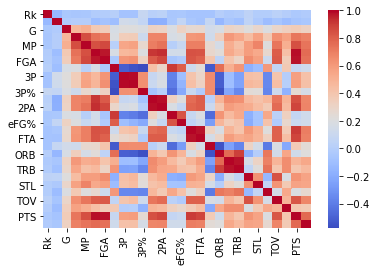

In [1574]:
sns.heatmap(sixteen_to_twenty_with_sal.corr(), annot=False, cmap='coolwarm');

In [1575]:
# features = sixteen_to_twenty_with_sal[['PTS', 'MP', 'GS', 'FG', 'FGA', 'AST', 'FT', 'STL', 'TRB', '3PA', '3P', '2PA']]
#features = sixteen_to_twenty_with_sal.drop(['Age', 'Rk', 'Tm', 'Pos', 'Season', 'Player', '2019-20'], axis=1)

In [1576]:
sixteen_to_twenty_with_sal.corr()['2019-20'].sort_values(ascending=False)

2019-20    1.000000
PTS        0.777871
FG         0.767685
FGA        0.747993
MP         0.738304
FT         0.706744
GS         0.697379
FTA        0.696733
2PA        0.684865
TOV        0.677175
2P         0.676427
AST        0.567211
STL        0.554729
DRB        0.544989
TRB        0.466665
3PA        0.428419
3P         0.423755
PF         0.376320
G          0.323772
BLK        0.271867
FT%        0.246529
ORB        0.224346
3P%        0.157425
2P%        0.134902
eFG%       0.133224
FG%        0.128468
Rk        -0.018450
Age       -0.048687
Name: 2019-20, dtype: float64

In [1577]:
sixteen_to_twenty_with_sal.columns

Index(['Player', 'Rk', 'Season', 'Pos', 'Age', 'Tm', 'G', 'GS', 'MP', 'FG',
       'FGA', 'FG%', '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT',
       'FTA', 'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF',
       'PTS', '2019-20'],
      dtype='object')

In [1578]:
features = ['G', 'GS', 'MP', 'FG',
       'FGA', 'FG%', '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT',
       'FTA', 'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF',
       'PTS']
X = sixteen_to_twenty_with_sal[features]

In [1579]:
poly = PolynomialFeatures(include_bias=False)

In [1580]:
poly_features = poly.fit_transform(X)

In [1581]:
df_poly = pd.DataFrame(poly_features, columns=poly.get_feature_names(features))
df_poly

,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,...,BLK^2,BLK TOV,BLK PF,BLK PTS,TOV^2,TOV PF,TOV PTS,PF^2,PF PTS,PTS^2
0,71.2,61.2,30.36,5.26,11.78,0.4494,1.26,3.84,0.3154,4.04,...,0.4356,0.9768,1.3596,9.2268,2.1904,3.0488,20.6904,4.2436,28.7988,195.4404
1,71.4,70.2,31.04,5.54,11.26,0.4904,1.26,3.40,0.3676,4.28,...,1.4884,1.8300,2.4156,16.4944,2.2500,2.9700,20.2800,3.9204,26.7696,182.7904
2,62.2,51.4,27.40,2.90,7.38,0.3856,1.22,3.64,0.3306,1.68,...,0.2916,0.6372,0.9828,4.5252,1.3924,2.1476,9.8884,3.3124,15.2516,70.2244
3,53.4,9.4,21.16,3.48,8.44,0.4086,1.02,2.74,0.3626,2.44,...,0.0324,0.2052,0.2880,1.8540,1.2996,1.8240,11.7420,2.5600,16.4800,106.0900
4,71.2,27.2,20.30,3.38,6.74,0.5070,0.26,0.80,0.2720,3.10,...,0.9216,1.2672,2.5344,8.5632,1.7424,3.4848,11.7744,6.9696,23.5488,79.5664
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
207,60.8,19.0,22.40,3.10,7.78,0.3932,2.12,5.68,0.3698,0.98,...,0.0100,0.0620,0.1240,0.8960,0.3844,0.7688,5.5552,1.5376,11.1104,80.2816
208,70.0,69.6,31.32,3.96,10.00,0.3966,2.20,5.98,0.3680,1.78,...,0.0400,0.2240,0.4200,2.3320,1.2544,2.3520,13.0592,4.4100,24.4860,135.9556
209,64.8,31.2,30.18,5.16,11.84,0.4358,1.66,4.54,0.3604,3.54,...,0.2704,0.8424,1.0088,7.3216,2.6244,3.1428,22.8096,3.7636,27.3152,198.2464
210,69.8,47.6,23.18,3.98,7.36,0.5460,0.00,0.04,0.1500,3.98,...,0.7056,0.8064,1.9656,7.8960,0.9216,2.2464,9.0240,5.4756,21.9960,88.3600


In [1595]:
twenty_sal = sixteen_to_twenty_with_sal['2019-20']

In [1596]:
df_poly['salary'] = twenty_sal

In [1597]:
df_poly

,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,...,BLK TOV,BLK PF,BLK PTS,TOV^2,TOV PF,TOV PTS,PF^2,PF PTS,PTS^2,salary
0,71.2,61.2,30.36,5.26,11.78,0.4494,1.26,3.84,0.3154,4.04,...,0.9768,1.3596,9.2268,2.1904,3.0488,20.6904,4.2436,28.7988,195.4404,19863636
1,71.4,70.2,31.04,5.54,11.26,0.4904,1.26,3.40,0.3676,4.28,...,1.8300,2.4156,16.4944,2.2500,2.9700,20.2800,3.9204,26.7696,182.7904,28000000
2,62.2,51.4,27.40,2.90,7.38,0.3856,1.22,3.64,0.3306,1.68,...,0.6372,0.9828,4.5252,1.3924,2.1476,9.8884,3.3124,15.2516,70.2244,9258000
3,53.4,9.4,21.16,3.48,8.44,0.4086,1.02,2.74,0.3626,2.44,...,0.2052,0.2880,1.8540,1.2996,1.8240,11.7420,2.5600,16.4800,106.0900,2320044
4,71.2,27.2,20.30,3.38,6.74,0.5070,0.26,0.80,0.2720,3.10,...,1.2672,2.5344,8.5632,1.7424,3.4848,11.7744,6.9696,23.5488,79.5664,4160000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
207,60.8,19.0,22.40,3.10,7.78,0.3932,2.12,5.68,0.3698,0.98,...,0.0620,0.1240,0.8960,0.3844,0.7688,5.5552,1.5376,11.1104,80.2816,7804878
208,70.0,69.6,31.32,3.96,10.00,0.3966,2.20,5.98,0.3680,1.78,...,0.2240,0.4200,2.3320,1.2544,2.3520,13.0592,4.4100,24.4860,135.9556,2564753
209,64.8,31.2,30.18,5.16,11.84,0.4358,1.66,4.54,0.3604,3.54,...,0.8424,1.0088,7.3216,2.6244,3.1428,22.8096,3.7636,27.3152,198.2464,12960000
210,69.8,47.6,23.18,3.98,7.36,0.5460,0.00,0.04,0.1500,3.98,...,0.8064,1.9656,7.8960,0.9216,2.2464,9.0240,5.4756,21.9960,88.3600,2177483


In [1772]:
df_poly.corr()['salary'].sort_values(ascending=False)

salary      1.000000
GS PTS      0.804791
MP PTS      0.799904
GS FG       0.798205
MP FG       0.797308
              ...   
2P%^2       0.122320
FG% eFG%    0.118835
eFG%^2      0.118816
FG% 2P%     0.115947
FG%^2       0.104090
Name: salary, Length: 351, dtype: float64

In [1616]:
X = df_poly[['GS PTS', 'MP PTS', 'GS FG', 'MP FG']]
y = sixteen_to_twenty_with_sal['2019-20']

In [1617]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 42)

In [1618]:
lr.fit(X_train, y_train)
knnr.fit(X_train, y_train)
dt.fit(X_train, y_train)
br.fit(X_train, y_train)
rf.fit(X_train, y_train)
svr.fit(X_train, y_train)
et.fit(X_train, y_train)

ExtraTreesRegressor()

In [1619]:
lr.score(X_train, y_train)

0.6525746004464315

In [1620]:
lr.score(X_test, y_test)

0.6755916456709952

In [1621]:
test_preds = lr.predict(X_test)

In [1622]:
train_preds = lr.predict(X_train)

In [1623]:
np.sqrt(mean_squared_error(y_train, train_preds))

6084114.315611926

In [1624]:
np.sqrt(mean_squared_error(y_test, test_preds))

5568278.7529211845

In [1625]:
knnr.score(X_train, y_train)

0.7571412101528118

In [1627]:
knnr.score(X_test, y_test)

0.5814849870856944

In [1628]:
knn_gridsearch.fit(X_train, y_train)

Fitting 5 folds for each of 80 candidates, totalling 400 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 400 out of 400 | elapsed:    3.3s finished


GridSearchCV(cv=5, estimator=KNeighborsRegressor(),
             param_grid={'leaf_size': [20, 30, 40, 50],
                         'n_neighbors': range(1, 100, 10),
                         'weights': ['uniform', 'distance']},
             verbose=1)

In [1629]:
knn_gridsearch.score(X_train, y_train)

1.0

In [1630]:
knn_gridsearch.score(X_test, y_test)

0.6858608939014197

In [1631]:
np.sqrt(mean_squared_error(y_train, train_preds))

6084114.315611926

In [1632]:
np.sqrt(mean_squared_error(y_test, test_preds))

5568278.7529211845

After bringing in polynomial features, my scores are still similar to how they performed originally. Even when gridsearching. I'll continue to try to improve the scores, but I think I will start moving towards classification.

With the classification models, I'll be using a function to use several years of data. I was working primarily with one year of salary in this notebook to get a feel for how the regression would work